Define paths

In [8]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from database.databaseFunctions import *
import seaborn as sns



Define variables and upload data for figures

In [87]:
circuit_n='turinghill'
variant= 11
n_species=2
mechanism='nogrowth'


query = f'''select mp."parID", ao."ssID", ao.system_class, pco.wavelength, ao.estimated_wvl, pco.convergence_time, ao.maxeig from pattern_class_output pco
-- select * from pattern_class_output pco
inner join model_param mp on pco.model_param_id = mp.model_param_id
inner join analytical_output ao on (ao.model_param_id,ao."ssID") = (pco.model_param_id, pco."ssID")

where ao.system_class in ('turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf', 'turing semi-hopf')

and mp.variant='{variant}'
-- where simulation_param_uuid='b94c9e61-a717-4470-957b-a59ff727e948'
and simulation_param_uuid='132323a4-3f93-4287-aca9-d18e84848e37';'''

df = df_from_general_query(query)
df = df.dropna()


/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [75]:
df = df.dropna()


In [117]:
sns.set_context("notebook")

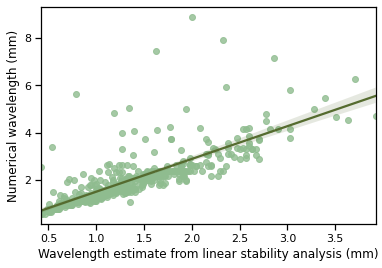

In [147]:
sns.regplot(x='estimated_wvl', y='wavelength', data=df, color='darkseagreen', line_kws={"color": "darkolivegreen"} )
plt.xlabel('Wavelength estimate from linear stability analysis (mm)')
plt.ylabel('Numerical wavelength (mm)')
plt.savefig()
plt.show()

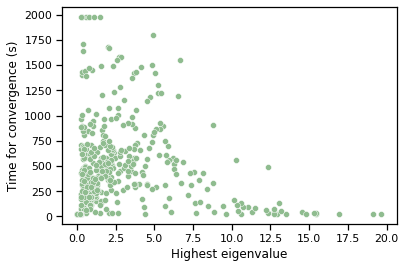

In [148]:
sns.scatterplot(x='maxeig' ,y='convergence_time', data=df,color='darkseagreen')
plt.xlabel('Highest eigenvalue')
plt.ylabel('Time for convergence (s)')
plt.savefig()
plt.show()

In [ ]:
from scipy.optimize import least_squares

# 1. Define the function
def func(x, a):
    return 1/np.log(x)
    # return a*b*x

# 2. Define the residuals function
def residuals(params, x, y_observed):
    return y_observed - func(x, *params)

def fit(x,y):
    initial_guess = [1]
    result = least_squares(residuals, initial_guess, args=(x, y))
    a_fit = result.x
    return [a_fit], func(x,a_fit)
    
fit(df['convergence_time'], df['maxeig'])